In [1]:
#importing needed libraries
import pandas as pd
import numpy as np

In [2]:
#importing the needed data
dataframe= pd.read_csv('electricity.csv')

In [3]:
#showing the first five rows of the data
dataframe.head()


,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [4]:
#dataframe description (summary of all the feautures)
dataframe.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


In [5]:
dataframe.describe(include=['object'])

,record_id,plant_name_ferc1,fuel_type_code_pudl,fuel_unit
count,29523,29523,29523,29343
unique,29523,2315,6,9
top,f1_fuel_2013_12_227_1_1,big stone,gas,mcf
freq,1,156,11486,11354


In [6]:
# showing the average of the average of all the numerical feauture
dataframe.mean()

utility_id_ferc1                1.186018e+02
report_year                     2.005806e+03
fuel_qty_burned                 2.622119e+06
fuel_mmbtu_per_unit             8.492111e+00
fuel_cost_per_unit_burned       2.086490e+02
fuel_cost_per_unit_delivered    9.175704e+02
fuel_cost_per_mmbtu             1.930435e+01
dtype: float64

In [7]:
#showing the sum of missing values
dataframe.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [8]:
#showing the values present in a particular column
dataframe['fuel_unit'].value_counts()

mcf       11354
ton        8958
bbl        7998
gramsU      464
mmbtu       180
kgU         110
mwhth       100
mwdth        95
gal          84
Name: fuel_unit, dtype: int64

In [9]:
#showing the number of rows and columns
dataframe.shape

(29523, 11)

In [10]:
#replace the missing 'fuel_unit' values by the most frequent 
dataframe["fuel_unit"].replace(np.nan, "mcf", inplace=True)

In [11]:
#checking sum of missing values to ensure there are still no missing values
dataframe.isnull().sum()

record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

In [12]:
#to show the data type in each column
dataframe.dtypes

record_id                        object
utility_id_ferc1                  int64
report_year                       int64
plant_name_ferc1                 object
fuel_type_code_pudl              object
fuel_unit                        object
fuel_qty_burned                 float64
fuel_mmbtu_per_unit             float64
fuel_cost_per_unit_burned       float64
fuel_cost_per_unit_delivered    float64
fuel_cost_per_mmbtu             float64
dtype: object

In [13]:
#finding relationship between the various features
dataframe.corr()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
utility_id_ferc1,1.000000,0.093323,-0.057447,-0.066946,-0.037863,-0.016414,0.006122
report_year,0.093323,1.000000,0.012952,-0.110853,0.013599,-0.014043,0.010261
fuel_qty_burned,-0.057447,0.012952,1.000000,-0.080946,-0.018535,-0.003551,-0.001896
fuel_mmbtu_per_unit,-0.066946,-0.110853,-0.080946,1.000000,-0.010034,-0.009039,-0.005884
fuel_cost_per_unit_burned,-0.037863,0.013599,-0.018535,-0.010034,1.000000,0.011007,-0.000437
fuel_cost_per_unit_delivered,-0.016414,-0.014043,-0.003551,-0.009039,0.011007,1.000000,-0.000109
fuel_cost_per_mmbtu,0.006122,0.010261,-0.001896,-0.005884,-0.000437,-0.000109,1.000000


In [14]:
#graphical representation of dataframe correlation (shows little or no correlation)
import seaborn as sns
sns.heatmap(dataframe.corr())

In [15]:
#showing all the different values and how many times they appear
dataframe['utility_id_ferc1'].value_counts()

194    1224
186     981
195     826
134     786
44      746
       ... 
283       2
208       2
513       2
285       1
287       1
Name: utility_id_ferc1, Length: 185, dtype: int64

In [16]:
#showing all the unique values in a column
dataframe['utility_id_ferc1'].unique()

array([  1,   2,   4,   6,   7,   9,  10,  11,  12,  15,  16,  17,  20,
        24,  26, 191,  31,   8,  42,  43,  44,  46,  50,  51,  54,  55,
        38,  73,  81, 127,  19,  36,  61,  63,  64,  68,  70,  72,  74,
        75,  77,  79,  80,  85,  96,  97,  98,  99,  27,  30,  52, 135,
        69,  87,  88, 121, 122, 102, 193, 194, 125, 126, 128, 129, 130,
       131, 132, 134, 137, 141, 142, 143, 145, 117, 146, 150, 151, 157,
       114, 115, 118, 161, 162, 163, 164, 166, 169, 170, 173, 176, 177,
       179, 182, 185, 186, 187, 188, 189,  33,  89, 200, 201, 204, 208,
       159, 119,  25,  49, 108, 155, 100, 107, 144, 116, 136,  67,  82,
        95, 133, 138, 148, 190,  56, 113,  32, 120, 147, 160, 175,  22,
        39,  62,  76, 101, 124, 154, 156, 174, 195, 104,  14,  57,  41,
        45, 149, 213, 210,  29,  94, 230,  71,  21, 202, 244, 226, 227,
        65, 171, 181, 221, 266, 245, 270, 276, 203, 271, 283, 281, 285,
       287, 196, 288, 294, 262, 178,  58, 432, 315, 403, 449, 45

In [17]:
#graphical representation of dataframe correlation (shows little or no correlation)
dataframe['report_year'].value_counts()

2000    1373
2001    1356
2005    1269
2007    1264
2010    1261
2006    1243
2012    1243
2011    1240
1994    1235
2008    1228
2009    1222
2003    1211
2002    1205
1995    1201
2013    1199
2004    1192
2014    1171
1998    1107
1997    1094
2015    1093
1996    1088
1999    1050
2016    1034
2017     993
2018     951
Name: report_year, dtype: int64

In [18]:
#showing all the unique values in a column
dataframe['report_year'].unique()

array([1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018], dtype=int64)

In [19]:
#showing all the unique values in a column
dataframe['plant_name_ferc1'].unique()

array(['rockport', 'rockport total plant', 'gorgas', ...,
       'airport unit 6', 'wyodak - bhp 20%', 'wygen 3 bhp 52%'],
      dtype=object)

In [20]:
#showing all the unique values in a column
dataframe['fuel_type_code_pudl'].unique()

array(['coal', 'gas', 'nuclear', 'oil', 'waste', 'other'], dtype=object)

In [21]:
#showing all the unique values in a column
dataframe['fuel_type_code_pudl'].value_counts()

gas        11486
coal        8547
oil         8064
nuclear      818
waste        441
other        167
Name: fuel_type_code_pudl, dtype: int64

In [22]:
#this shows the the unique fuel unit it was recorded in
dataframe['fuel_unit'].value_counts()

mcf       11534
ton        8958
bbl        7998
gramsU      464
mmbtu       180
kgU         110
mwhth       100
mwdth        95
gal          84
Name: fuel_unit, dtype: int64

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
#regrouping the data by year to understand data better
dataframe1994 = dataframe[dataframe.report_year == 1994]

In [25]:
#the head of the new group
dataframe1994.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [26]:
#dsummary of new dataset
dataframe1994.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,1235.000000,1235.0,1.235000e+03,1235.000000,1235.000000,1235.000000,1235.000000
mean,106.120648,1994.0,2.724018e+06,10.638098,213.191996,63.636060,3.086977
std,61.637376,0.0,8.204347e+06,13.708367,2639.254133,1288.748659,13.120614
min,1.000000,1994.0,2.000000e+00,0.000006,-57.490000,-58.800000,-3.003000
25%,49.000000,1994.0,2.890950e+04,1.021000,2.667000,2.326000,1.389170
50%,115.000000,1994.0,3.484640e+05,5.686920,20.290000,13.156000,1.972000
75%,161.000000,1994.0,1.423604e+06,21.062000,35.766500,30.910000,3.003500
max,208.000000,1994.0,8.937973e+07,124.860000,44009.190000,45115.000000,443.336000


In [27]:
#summary of data including object
dataframe1994.describe(include=['object'])

,record_id,plant_name_ferc1,fuel_type_code_pudl,fuel_unit
count,1235,1235,1235,1235
unique,1235,864,6,8
top,f1_fuel_1994_12_135_1_10,riverside,gas,mcf
freq,1,7,487,500


In [28]:
dataframe1994['plant_name_ferc1'].value_counts()

riverside         7
conemaugh         6
independence      6
big stone         5
deepwater         4
                 ..
merl parr         1
cimarron river    1
wcb #6            1
franklin drive    1
bowline(e)        1
Name: plant_name_ferc1, Length: 864, dtype: int64

In [29]:
dataframe1994['fuel_type_code_pudl'].value_counts()

gas        487
coal       475
oil        166
nuclear     71
waste       24
other       12
Name: fuel_type_code_pudl, dtype: int64

In [30]:
dataframe1995 = dataframe[dataframe.report_year == 1995]

In [31]:
dataframe.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


In [32]:
#grouping data understand the most used fuel according fuel type
df_fuel_usage= dataframe.groupby('fuel_type_code_pudl')['fuel_qty_burned'].mean()

In [33]:
df_fuel_usage

fuel_type_code_pudl
coal       1.903473e+06
gas        4.843183e+06
nuclear    5.454838e+06
oil        6.311677e+04
other      2.948137e+06
waste      1.171914e+05
Name: fuel_qty_burned, dtype: float64

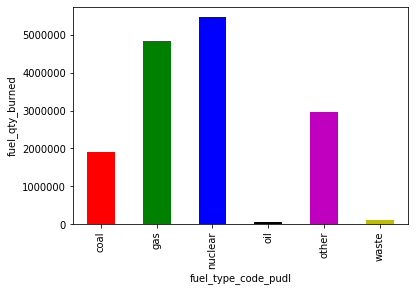

In [34]:
df_fuel_usage.plot.bar( label='index', color=['r', 'g', 'b', 'k', 'm', 'y'])
plt.xlabel('fuel_type_code_pudl')
plt.ylabel('fuel_qty_burned')
plt.show()


In [35]:
df_fuel_usage1= dataframe.groupby('fuel_type_code_pudl')['fuel_qty_burned'].sum()

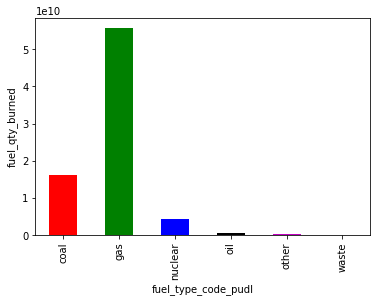

In [36]:
df_fuel_usage1.plot.bar( label='index', color=['r', 'g', 'b', 'k', 'm', 'y'])
plt.xlabel('fuel_type_code_pudl')
plt.ylabel('fuel_qty_burned')
plt.show()
#from this graph we can see that the most used fuel is gas

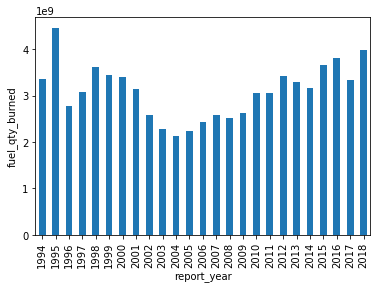

In [37]:
df_fuel_usageyear= dataframe.groupby('report_year')['fuel_qty_burned'].sum()
df_fuel_usageyear.plot.bar( label='index')
plt.xlabel('report_year')
plt.ylabel('fuel_qty_burned')
plt.show()
#from this graph we understand that the 1995 used the most fuel

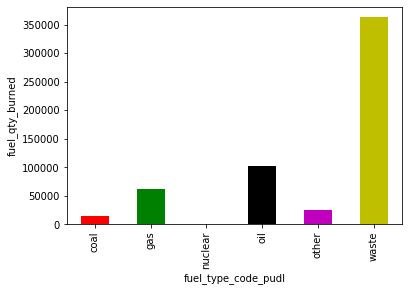

In [38]:
df_fuel_usagecost= dataframe.groupby('fuel_type_code_pudl')['fuel_cost_per_mmbtu'].sum()
df_fuel_usagecost.plot.bar( label='index', color=['r', 'g', 'b', 'k', 'm', 'y'])
plt.xlabel('fuel_type_code_pudl')
plt.ylabel('fuel_qty_burned')
plt.show()
#from the graphs we can see gas was the most burnt fuel and from the cost we can say that fuel produced from waste is more expensive

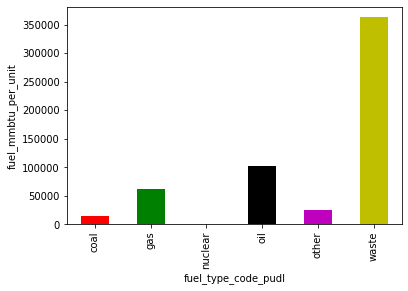

In [39]:
df_fuel_usagecost1= dataframe.groupby('fuel_type_code_pudl')['fuel_mmbtu_per_unit'].sum()
df_fuel_usagecost.plot.bar( label='index', color=['r', 'g', 'b', 'k', 'm', 'y'])
plt.xlabel('fuel_type_code_pudl')
plt.ylabel('fuel_mmbtu_per_unit')
plt.show()

In [40]:
cost_per_plant= dataframe.groupby('plant_name_ferc1')['fuel_mmbtu_per_unit'].mean().to_frame()
cost_per_plant

,fuel_mmbtu_per_unit
plant_name_ferc1,
(1)sta98,1.031000
(2) scriba sta. 99,0.000120
(n) contra costa,1.030497
(n) pittsburg,1.028679
(n)(t)moss landing,1.021308
...,...
zimmer- aepgr share,14.896952
zion,117.750000
zorn,1.025000
